# Predicting customer churn for Tshally Foods

### The Goal
- The project aims to develop a predictive model using classical machine learning algorithms to forecast product demand for Tshally Foods Limited.


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

#### Read and load file

In [2]:
try:
    Customer_Churn = pd.read_csv('customers_delivery.csv')
    # Display the first few rows and the structure of the dataset
    display(Customer_Churn.info(), Customer_Churn.head())
except Exception as e:
    print(f"An error occurred: {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         388 non-null    int64 
 1   Gender                      388 non-null    object
 2   Marital Status              388 non-null    object
 3   Occupation                  388 non-null    object
 4   Monthly Income              388 non-null    object
 5   Educational Qualifications  388 non-null    object
 6   Family size                 388 non-null    int64 
 7   Location                    388 non-null    object
 8   Medium                      388 non-null    object
 9   Oatmeal-1kg                 388 non-null    object
 10  Oatmeal-2kg                 388 non-null    object
 11  Oatmeal-5kg                 388 non-null    object
 12  Fonio-1kg                   387 non-null    object
 13  Garri-1kg                   388 non-null    object

None

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Location,Medium,Oatmeal-1kg,...,Order Time,Google Maps Accuracy,Influence of rating,Packaging_Quality,Politeness,Freshness,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Married,Employeed,>200000,Post Graduate,4,Lagos,Supermarkets,Yes,...,Weekend (Sat & Sun),Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n
1,24,Female,Married,Employeed,>200000,Graduate,3,Lagos,Supermarkets,Yes,...,Anytime (Mon-Sun),Neutral,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Married,Employeed,>200000,Post Graduate,3,Lagos,Supermarkets,Yes,...,Anytime (Mon-Sun),Strongly Agree,Yes,Very Important,Very Important,Very Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Married,Employeed,>200000,Graduate,6,Lagos,Supermarkets,Yes,...,Anytime (Mon-Sun),Agree,Yes,Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Married,Employeed,>200000,Post Graduate,4,Lagos,Direct call,Yes,...,Weekend (Sat & Sun),Agree,Yes,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [3]:
#Customer_Churn

In [4]:
#check numbe of columns and rows
Customer_Churn .shape

(388, 35)

In [5]:
Customer_Churn.duplicated().sum() # check for duplication

5

In [6]:
#drop the duplicated rows
Customer_Churn = Customer_Churn.drop_duplicates()

In [7]:
#perform sanity checks
Customer_Churn.duplicated().sum()


0

In [8]:
import pandas as pd

# Replace spaces with underscores in column names
Customer_Churn.columns = Customer_Churn.columns.str.replace(' ', '_')

In [9]:
# sanity check
Customer_Churn.columns

Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'Location', 'Medium',
       'Oatmeal-1kg', 'Oatmeal-2kg', 'Oatmeal-5kg', 'Fonio-1kg', 'Garri-1kg',
       'Plantain_Chips_-1kg', 'Buying_Convenience', 'Easy_Payment_option',
       'Discount_Opinons', 'Product_Quality', 'Health_Concern',
       'Prompt_Delivery', 'Delivery_Experince', 'Affordability',
       'Accessibility', 'Time_Importance', 'Order_Time',
       'Google_Maps_Accuracy', 'Influence_of_rating', 'Packaging_Quality',
       'Politeness', 'Freshness', 'Good_Taste_', 'Good_Quantity', 'Output',
       'Reviews'],
      dtype='object')

In [10]:
#check null null value
Customer_Churn.isna().sum()

Age                           0
Gender                        0
Marital_Status                0
Occupation                    0
Monthly_Income                0
Educational_Qualifications    0
Family_size                   0
Location                      0
Medium                        0
Oatmeal-1kg                   0
Oatmeal-2kg                   0
Oatmeal-5kg                   0
Fonio-1kg                     1
Garri-1kg                     0
Plantain_Chips_-1kg           0
Buying_Convenience            0
Easy_Payment_option           0
Discount_Opinons              0
Product_Quality               0
Health_Concern                0
Prompt_Delivery               0
Delivery_Experince            0
Affordability                 0
Accessibility                 0
Time_Importance               0
Order_Time                    0
Google_Maps_Accuracy          0
Influence_of_rating           0
Packaging_Quality             0
Politeness                    0
Freshness                     0
Good_Tas

In [11]:
#drop the NAN value since it is only one and will not impact the data much
Customer_Churn.dropna(inplace = True)

In [12]:
#sanity check
Customer_Churn.isna().sum()

Age                           0
Gender                        0
Marital_Status                0
Occupation                    0
Monthly_Income                0
Educational_Qualifications    0
Family_size                   0
Location                      0
Medium                        0
Oatmeal-1kg                   0
Oatmeal-2kg                   0
Oatmeal-5kg                   0
Fonio-1kg                     0
Garri-1kg                     0
Plantain_Chips_-1kg           0
Buying_Convenience            0
Easy_Payment_option           0
Discount_Opinons              0
Product_Quality               0
Health_Concern                0
Prompt_Delivery               0
Delivery_Experince            0
Affordability                 0
Accessibility                 0
Time_Importance               0
Order_Time                    0
Google_Maps_Accuracy          0
Influence_of_rating           0
Packaging_Quality             0
Politeness                    0
Freshness                     0
Good_Tas

- No Nan value remaining

In [13]:
#observe the target variable Monthly_income
Customer_Churn['Monthly_Income'].unique()

array(['>200000', '<50000', '<200000', '>100000'], dtype=object)

In [14]:
#check datatype for all the columns
#Customer_Churn.dtypes

In [15]:
target_mapping = {'<50000':0,'>100000':1,'<200000':2,'>200000':3}
Customer_Churn['Monthly_Income'] = Customer_Churn['Monthly_Income'].map(target_mapping)

In [16]:
#sanity check on the Monthly_Income column
Customer_Churn['Monthly_Income'].unique()

array([3, 0, 2, 1], dtype=int64)

In [17]:
Customer_Churn.columns

Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'Location', 'Medium',
       'Oatmeal-1kg', 'Oatmeal-2kg', 'Oatmeal-5kg', 'Fonio-1kg', 'Garri-1kg',
       'Plantain_Chips_-1kg', 'Buying_Convenience', 'Easy_Payment_option',
       'Discount_Opinons', 'Product_Quality', 'Health_Concern',
       'Prompt_Delivery', 'Delivery_Experince', 'Affordability',
       'Accessibility', 'Time_Importance', 'Order_Time',
       'Google_Maps_Accuracy', 'Influence_of_rating', 'Packaging_Quality',
       'Politeness', 'Freshness', 'Good_Taste_', 'Good_Quantity', 'Output',
       'Reviews'],
      dtype='object')

In [18]:
#Customer_Churn.info()

In [19]:
#more sanity check
Customer_Churn.head(10)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Location,Medium,Oatmeal-1kg,...,Order_Time,Google_Maps_Accuracy,Influence_of_rating,Packaging_Quality,Politeness,Freshness,Good_Taste_,Good_Quantity,Output,Reviews
0,20,Female,Married,Employeed,3,Post Graduate,4,Lagos,Supermarkets,Yes,...,Weekend (Sat & Sun),Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\r\n
1,24,Female,Married,Employeed,3,Graduate,3,Lagos,Supermarkets,Yes,...,Anytime (Mon-Sun),Neutral,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Married,Employeed,3,Post Graduate,3,Lagos,Supermarkets,Yes,...,Anytime (Mon-Sun),Strongly Agree,Yes,Very Important,Very Important,Very Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Married,Employeed,3,Graduate,6,Lagos,Supermarkets,Yes,...,Anytime (Mon-Sun),Agree,Yes,Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Married,Employeed,3,Post Graduate,4,Lagos,Direct call,Yes,...,Weekend (Sat & Sun),Agree,Yes,Important,Important,Important,Very Important,Very Important,Yes,NIL
5,27,Female,Married,Employeed,3,Post Graduate,2,Lagos,Supermarkets,No,...,Anytime (Mon-Sun),Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,NIL
6,22,Male,Married,Employeed,3,Graduate,3,Lagos,Supermarkets,Yes,...,Anytime (Mon-Sun),Strongly Agree,Yes,Very Important,Important,Very Important,Very Important,Very Important,Yes,Nil
7,24,Female,Married,Employeed,3,Post Graduate,3,Lagos,Supermarkets,Yes,...,Weekend (Sat & Sun),Agree,Maybe,Important,Slightly Important,Important,Very Important,Very Important,Yes,NIL
8,23,Female,Married,Employeed,3,Post Graduate,2,Lagos,Supermarkets,Yes,...,Anytime (Mon-Sun),Disagree,Maybe,Important,Important,Important,Important,Important,Yes,Nil
9,23,Female,Married,Employeed,3,Post Graduate,4,Lagos,Supermarkets,Yes,...,Weekend (Sat & Sun),Agree,Yes,Very Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil


In [20]:
Customer_Churn.tail(10)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,Location,Medium,Oatmeal-1kg,...,Order_Time,Google_Maps_Accuracy,Influence_of_rating,Packaging_Quality,Politeness,Freshness,Good_Taste_,Good_Quantity,Output,Reviews
378,23,Female,Single,Employee,1,Post Graduate,2,Binin,Jumia,Yes,...,Anytime (Mon-Sun),Strongly Agree,Yes,Moderately Important,Important,Important,Very Important,Very Important,Yes,My location is pretty well built for food deli...
379,22,Male,Single,Student,0,Post Graduate,4,Warri,Jumia,Yes,...,Weekend (Sat & Sun),Agree,Yes,Important,Important,Important,Very Important,Very Important,Yes,NIL
380,27,Female,Married,Employee,3,Post Graduate,2,Warri,Jumia,Yes,...,Anytime (Mon-Sun),Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,NIL
381,22,Male,Single,Student,0,Graduate,3,Sapele,Jumia,Yes,...,Anytime (Mon-Sun),Strongly Agree,Yes,Very Important,Important,Very Important,Very Important,Very Important,Yes,Nil
382,24,Female,Single,Student,0,Post Graduate,3,Sapele,Jumia,Yes,...,Weekend (Sat & Sun),Agree,Maybe,Important,Slightly Important,Important,Very Important,Very Important,Yes,NIL
383,23,Female,Single,Student,0,Post Graduate,2,Sapele,Jumia,Yes,...,Anytime (Mon-Sun),Disagree,Maybe,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,0,Post Graduate,4,Sapele,Jumia,Yes,...,Weekend (Sat & Sun),Agree,Yes,Very Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,0,Post Graduate,5,Enugu,Jumia,Yes,...,Anytime (Mon-Sun),Agree,Yes,Very Important,Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,0,Post Graduate,2,Enugu,Supermarkets,Yes,...,Weekend (Sat & Sun),Disagree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...
387,23,Male,Single,Student,0,Post Graduate,5,Enugu,Direct call,Yes,...,Weekend (Sat & Sun),Agree,Maybe,Unimportant,Moderately Important,Moderately Important,Moderately Important,Slightly Important,Yes,Nil


In [21]:

# Convert 'yes' to 'Yes' and 'no' to 'No' in all columns
Customer_Churn = Customer_Churn.apply(lambda x: x.str.capitalize() if x.dtype == "object" else x)

In [22]:
Customer_Churn.isna().sum()

Age                           0
Gender                        0
Marital_Status                0
Occupation                    0
Monthly_Income                0
Educational_Qualifications    0
Family_size                   0
Location                      0
Medium                        0
Oatmeal-1kg                   0
Oatmeal-2kg                   0
Oatmeal-5kg                   0
Fonio-1kg                     0
Garri-1kg                     0
Plantain_Chips_-1kg           0
Buying_Convenience            0
Easy_Payment_option           0
Discount_Opinons              0
Product_Quality               0
Health_Concern                0
Prompt_Delivery               0
Delivery_Experince            0
Affordability                 0
Accessibility                 0
Time_Importance               0
Order_Time                    0
Google_Maps_Accuracy          0
Influence_of_rating           0
Packaging_Quality             0
Politeness                    0
Freshness                     0
Good_Tas

In [23]:
Customer_Churn.duplicated().sum()

0

- The dataset is clean and ready to be used for further use.
- The next step will be visualization

In [24]:
# Summary Statistics
Customer_Churn.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,382.0,24.643979,2.993247,18.0,23.0,24.0,26.00,33.0
Monthly_Income,382.0,1.007853,1.228464,0.0,0.0,1.0,2.75,3.0
Family_size,382.0,3.607330,1.976967,1.0,2.0,3.0,5.00,10.0


#### Visualization

#### Perform Univariate visualization on the Numerical variables
##### Age

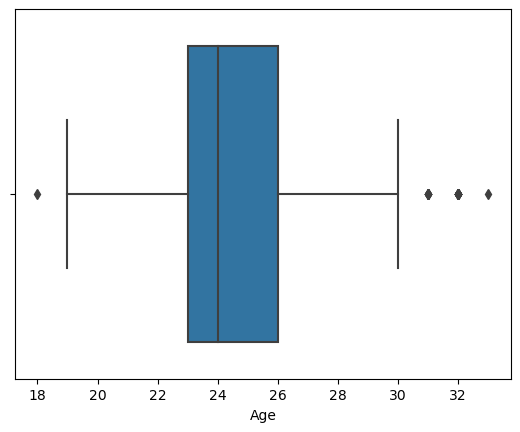

In [25]:
# Visualizing the 'Age' column
sns.boxplot(data=Customer_Churn, x='Age')
# Show the plot
plt.show()

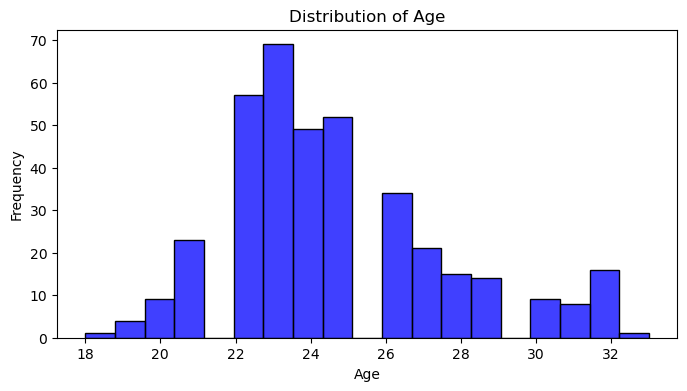

In [26]:
# Histogram of Age
plt.figure(figsize=(8, 4))
sns.histplot(Customer_Churn['Age'], kde=False, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- Outliers were dictated in both left and whisker. However more outliers occured in the right whisker between the agen range of 30+ and above

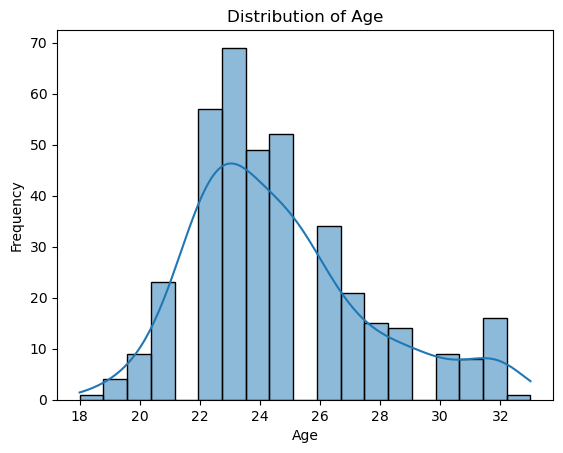

In [27]:
# Create a histogram with KDE
sns.histplot(data=Customer_Churn, x='Age', kde=True)
# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
# Show the plot
plt.show()

- The distribution is slightly skewed to the right

#### Monthly_Income

- To understand this column very well, we need to know that incomes are mapped as <500000 = 0,>100000 = 1,<200000 = 2,>200000 = 3

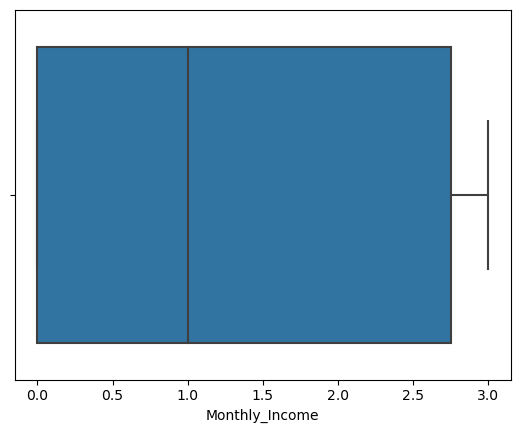

In [28]:
# Visualizing the 'Monthly_Income' column
sns.boxplot(data=Customer_Churn, x='Monthly_Income')
# Show the plot
plt.show()

- The visualization did not show any outlier

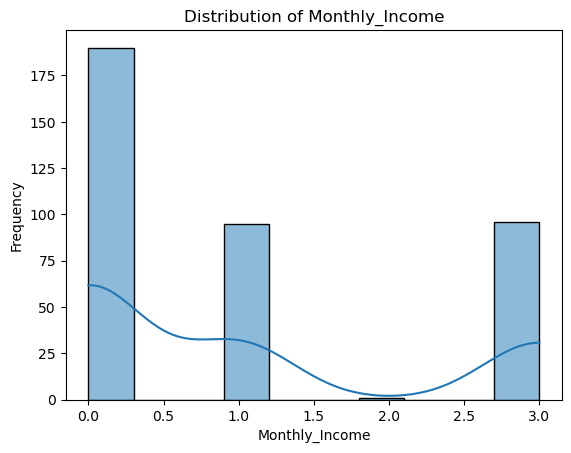

In [29]:
# Create a histogram with KDE
sns.histplot(data=Customer_Churn, x='Monthly_Income', kde=True)
# Set labels and title
plt.xlabel('Monthly_Income')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly_Income')
# Show the plot
plt.show()

- The distribution is not evenly distributed. It showed that more people earned <50,000 among our customers

#### Family_size

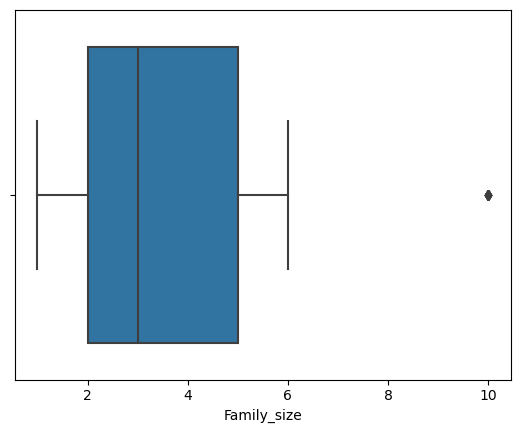

In [30]:
# Visualizing the 'Monthly_Income' column
sns.boxplot(data=Customer_Churn, x='Family_size')
# Show the plot
plt.show()

- Outlier is detected at the right whisker

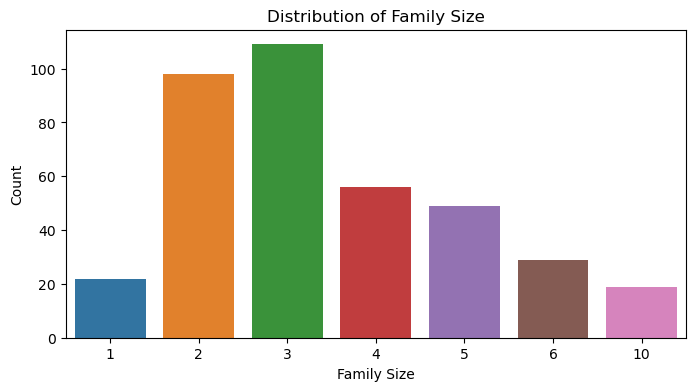

In [31]:
# Countplot for Family Size
plt.figure(figsize=(8, 4))
sns.countplot(x='Family_size', data=Customer_Churn)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

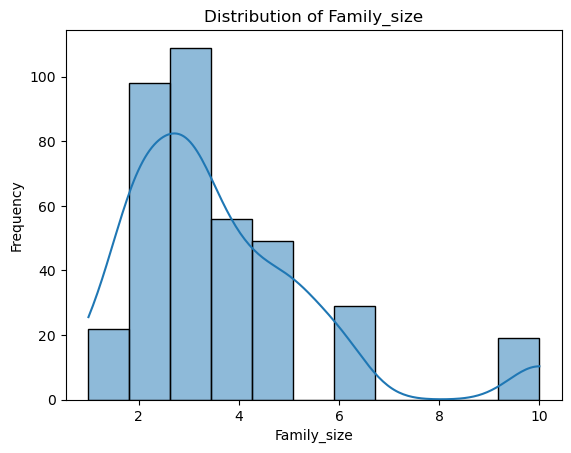

In [32]:
# Create a histogram with KDE
sns.histplot(data=Customer_Churn, x='Family_size', kde=True)
# Set labels and title
plt.xlabel('Family_size')
plt.ylabel('Frequency')
plt.title('Distribution of Family_size')
# Show the plot
plt.show()

- The distribution is skewed to the right. We have more families that has the size between 2,3 and 4.

#### Perform Multivariate visualization on the Categorical variables

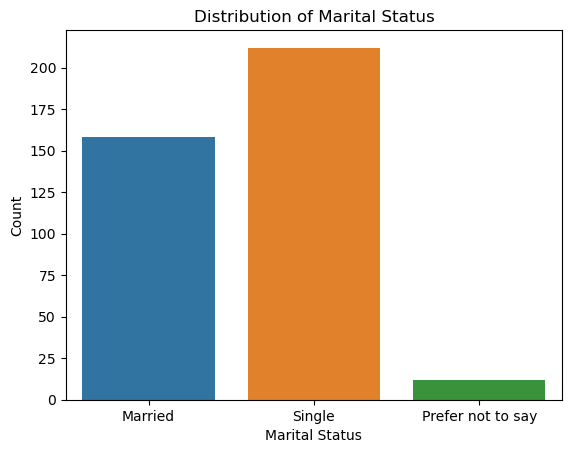

In [33]:
# Create a count plot fro Marital_Status
sns.countplot(data=Customer_Churn, x='Marital_Status')
# Set labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')

# Show the plot
plt.show()



- We have more single people as our customers than married people. However we still have a substantial number of customers that are married. People that prefere not to disclose their marital status are less than 25


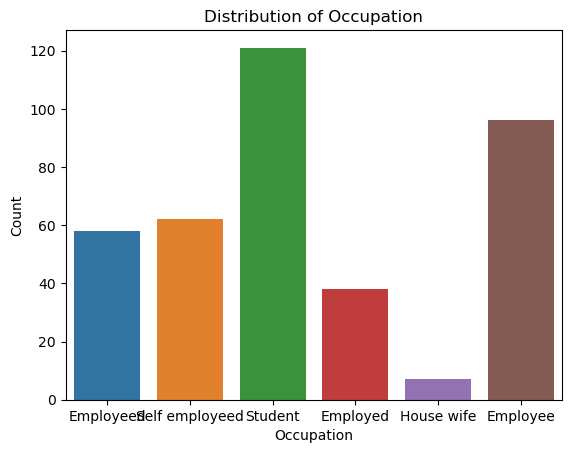

In [34]:
# Create a count plot for occupation
sns.countplot(data=Customer_Churn, x='Occupation')
# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Occupation')

# Show the plot
plt.show()

- We have more students followed closely by employed. House wife are low among our customers

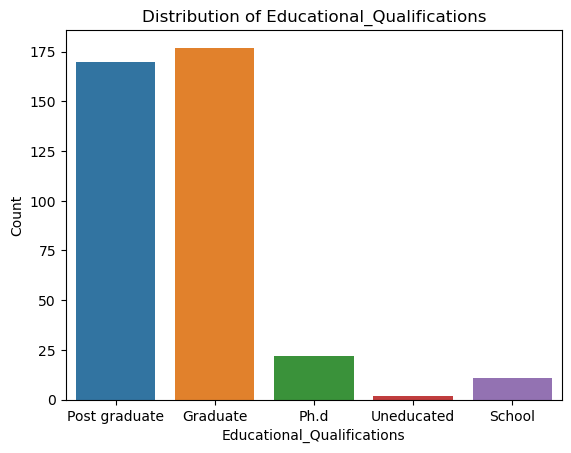

In [35]:
# Create a count plot for Educational_Qualifications
sns.countplot(data=Customer_Churn, x='Educational_Qualifications')
# Set labels and title
plt.xlabel('Educational_Qualifications')
plt.ylabel('Count')
plt.title('Distribution of Educational_Qualifications')

# Show the plot
plt.show()

- We have more Post Graduate and Graduates as our customers. Uneducated seems to be the least in our list

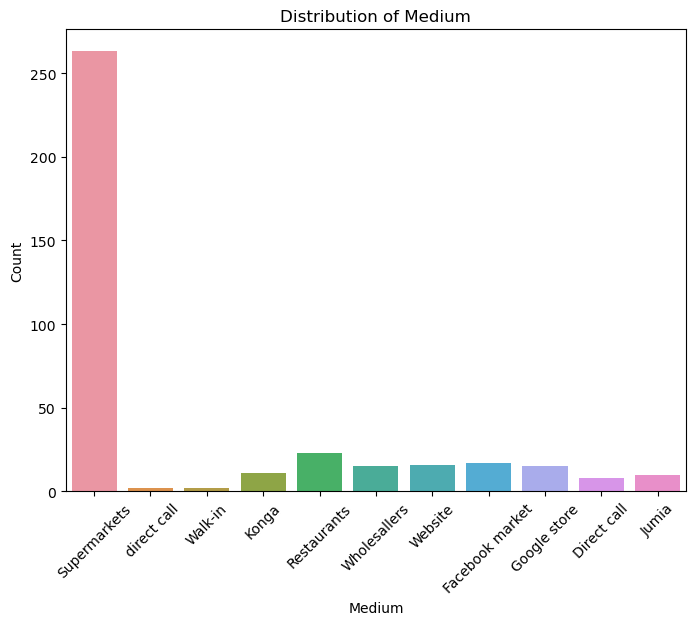

In [36]:

# Create a count plot for Medium
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=Customer_Churn, x='Medium')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# Set labels and title
plt.xlabel('Medium')
plt.ylabel('Count')
plt.title('Distribution of Medium')

# Show the plot
plt.show()


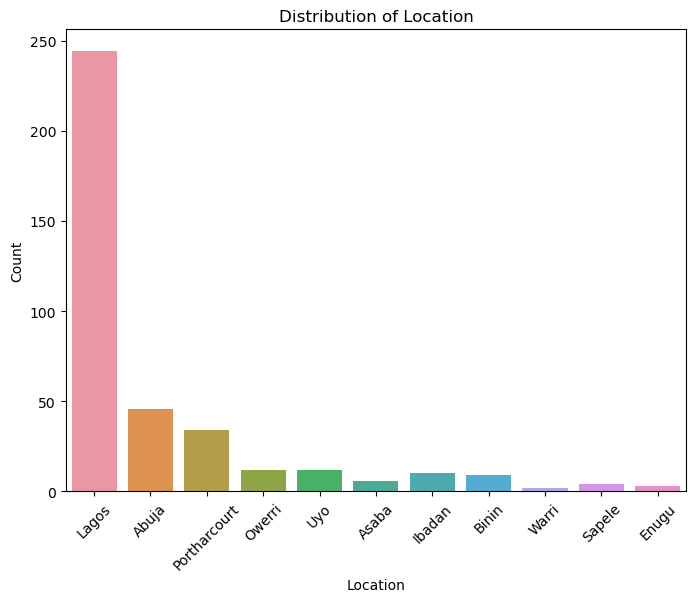

In [37]:

# Create a count plot for Location
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=Customer_Churn, x='Location')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# Set labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Location')

# Show the plot
plt.show()

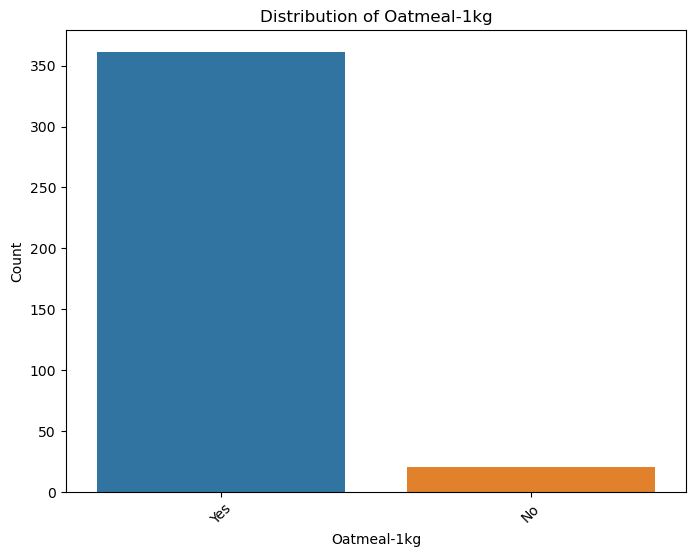

In [38]:
# Create a count plot for Oatmeal-1kg
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=Customer_Churn, x='Oatmeal-1kg')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# Set labels and title
plt.xlabel('Oatmeal-1kg')
plt.ylabel('Count')
plt.title('Distribution of Oatmeal-1kg')

# Show the plot
plt.show()

- Most of our customers buys our 1kg product while less than 25 of our customers don't buy our product

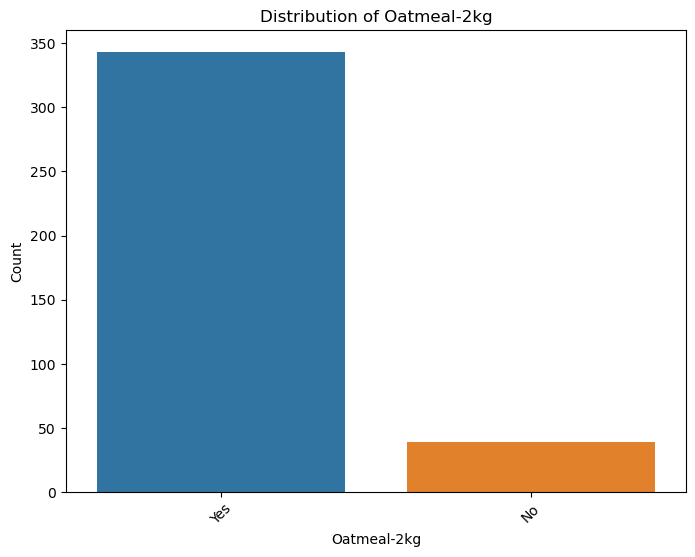

In [39]:
# Create a count plot for Oatmeal 2kg
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=Customer_Churn, x='Oatmeal-2kg')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# Set labels and title
plt.xlabel('Oatmeal-2kg')
plt.ylabel('Count')
plt.title('Distribution of Oatmeal-2kg')

# Show the plot
plt.show()

- Most of our customers also buy our 2kg product but we have more than 30 people that does not buy the product

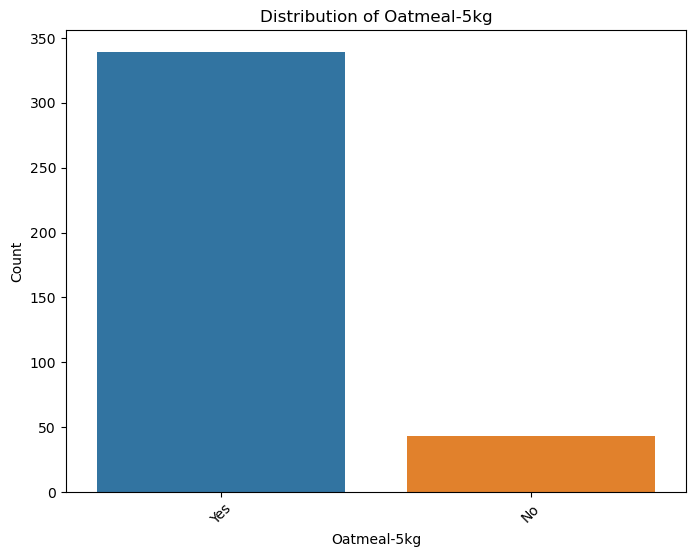

In [40]:
# Create a count plot for Oatmeal 5kg
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=Customer_Churn, x='Oatmeal-5kg')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# Set labels and title
plt.xlabel('Oatmeal-5kg')
plt.ylabel('Count')
plt.title('Distribution of Oatmeal-5kg')

# Show the plot
plt.show()

- Most of our customers also buy our 5kg product but we have more than 30 people but less than 50 who does not buy the 5kg  product

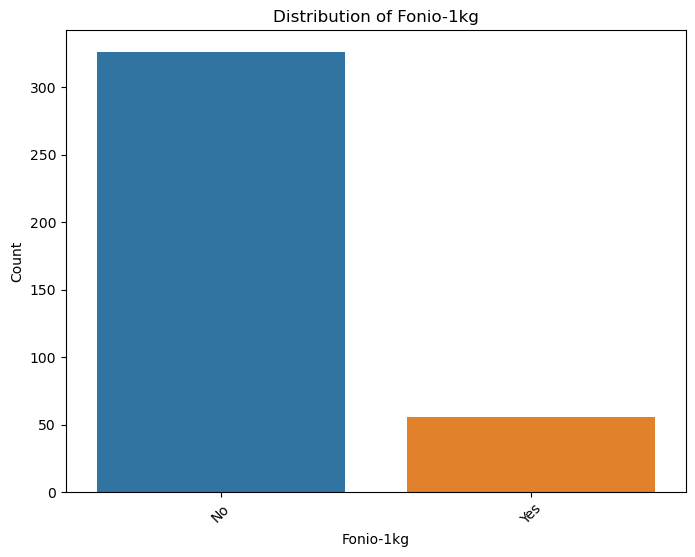

In [41]:
# Create a count plot for Oatmeal 5kg
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.countplot(data=Customer_Churn, x='Fonio-1kg')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
# Set labels and title
plt.xlabel('Fonio-1kg')
plt.ylabel('Count')
plt.title('Distribution of Fonio-1kg')

# Show the plot
plt.show()

- Less than 50 people out of 387 people buy our Fonio product

#### Bivariate Analysis

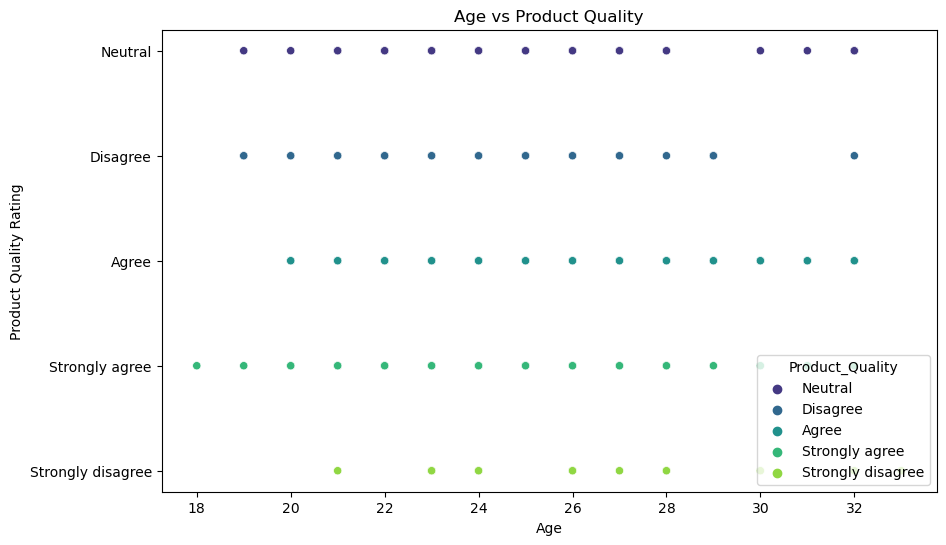

In [42]:
# Scatter plot for Age vs Product Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Product_Quality', hue='Product_Quality', data=Customer_Churn, palette='viridis')
plt.title('Age vs Product Quality')
plt.xlabel('Age')
plt.ylabel('Product Quality Rating')
plt.show()

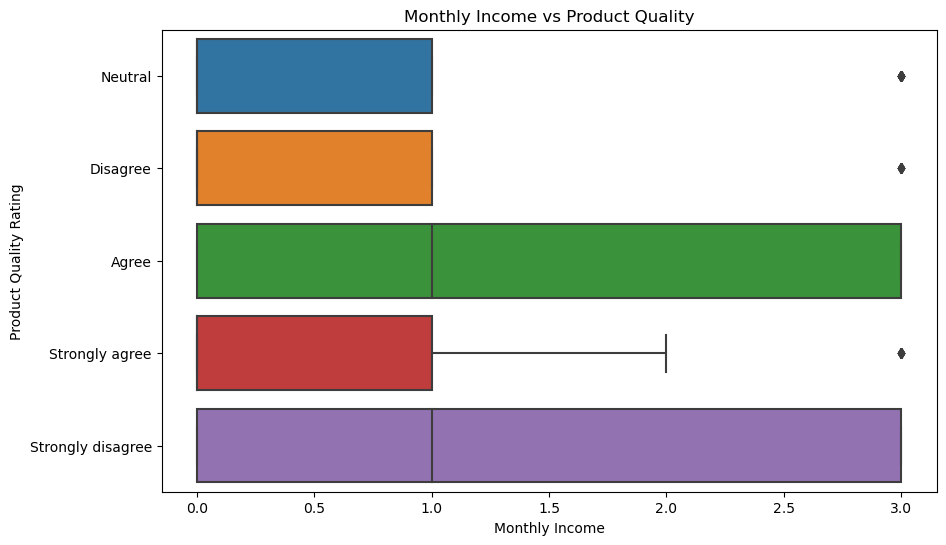

In [43]:
# Boxplot for Monthly Income vs Product Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x=Customer_Churn['Monthly_Income'], y='Product_Quality', data=Customer_Churn)
plt.title('Monthly Income vs Product Quality')
plt.xlabel('Monthly Income')
plt.ylabel('Product Quality Rating')
plt.show()

#### Data Preprocessing

Handling categorical variables and scaling numerical features

In [44]:
# Print the column names to confirm the presence of 'Output'
print(Customer_Churn.columns)


Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'Location', 'Medium',
       'Oatmeal-1kg', 'Oatmeal-2kg', 'Oatmeal-5kg', 'Fonio-1kg', 'Garri-1kg',
       'Plantain_Chips_-1kg', 'Buying_Convenience', 'Easy_Payment_option',
       'Discount_Opinons', 'Product_Quality', 'Health_Concern',
       'Prompt_Delivery', 'Delivery_Experince', 'Affordability',
       'Accessibility', 'Time_Importance', 'Order_Time',
       'Google_Maps_Accuracy', 'Influence_of_rating', 'Packaging_Quality',
       'Politeness', 'Freshness', 'Good_Taste_', 'Good_Quantity', 'Output',
       'Reviews'],
      dtype='object')


In [48]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming Customer_Churn is correctly loaded into a DataFrame

# Encode the 'Output' column first
label_encoder = LabelEncoder()
Customer_Churn['Output'] = label_encoder.fit_transform(Customer_Churn['Output'])

# Identify categorical columns (excluding 'Output' which is now numeric)
categorical_cols = Customer_Churn.select_dtypes(include=['object']).columns.tolist()

# Create the ColumnTransformer with OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Apply ColumnTransformer and directly create a DataFrame
X_transformed = ct.fit_transform(Customer_Churn)
column_names = ct.get_feature_names_out()

# Check if the shape issue persists
print("Transformed data shape:", X_transformed.shape)
print("Number of columns from ColumnTransformer:", len(column_names))

# Attempt to create the DataFrame directly after transformation
try:
    X = pd.DataFrame(X_transformed, columns=column_names)
    print("DataFrame created successfully!")
except Exception as e:
    print("Failed to create DataFrame:", e)

# Proceed with data splitting
y = Customer_Churn['Output'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Transformed data shape: (382, 314)
Number of columns from ColumnTransformer: 314
Failed to create DataFrame: Shape of passed values is (382, 1), indices imply (382, 314)


In [49]:
import numpy as np

# Convert the transformed data to a dense format if it's a sparse matrix
if isinstance(X_transformed, np.ndarray):
    X_dense = X_transformed
else:
    X_dense = X_transformed.toarray()  # Convert sparse matrix to a dense matrix

# Attempt to create the DataFrame with the dense array
try:
    X = pd.DataFrame(X_dense, columns=column_names)
    print("DataFrame created successfully!")
except Exception as e:
    print("Failed to create DataFrame:", e)


DataFrame created successfully!


In [50]:
# Print the type and shape of the transformed data to diagnose issues
print("Type of transformed data:", type(X_transformed))
print("Shape of transformed data:", X_transformed.shape)

# Verify that the transformation is producing the expected output
if hasattr(X_transformed, 'shape'):
    print("Shape directly from the transformed object:", X_transformed.shape)


Type of transformed data: <class 'scipy.sparse._csr.csr_matrix'>
Shape of transformed data: (382, 314)
Shape directly from the transformed object: (382, 314)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()

# Train the models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
logistic_preds = logistic_model.predict(X_test)
rf_preds = random_forest_model.predict(X_test)
dt_preds = decision_tree_model.predict(X_test)

# Print model performance
def print_model_performance(model_name, true_values, predictions):
    print(f"Performance Metrics for {model_name}:")
    print("Classification Report:\n", classification_report(true_values, predictions))
    print("Confusion Matrix:\n", confusion_matrix(true_values, predictions))
    print("Accuracy:", accuracy_score(true_values, predictions), "\n")

print_model_performance("Logistic Regression", y_test, logistic_preds)
print_model_performance("Random Forest", y_test, rf_preds)
print_model_performance("Decision Tree", y_test, dt_preds)


Performance Metrics for Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        62

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Confusion Matrix:
 [[15  0]
 [ 0 62]]
Accuracy: 1.0 

Performance Metrics for Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        62

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Confusion Matrix:
 [[15  0]
 [ 0 62]]
Accuracy: 1.0 

Performance Metrics for Decision Tree:
Classification Report:
               precision    recall  f1-score

In [52]:
from sklearn.model_selection import cross_val_score

# Example of cross-validating the Random Forest model
cv_scores = cross_val_score(random_forest_model, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.8961039  0.94805195 0.94736842 0.98684211 1.        ]
Mean CV Accuracy: 0.9556732740943268
